# **XGBoost**  
Objetivo: Realizar un forecast con XGBoost

# Librerías

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor

# Funciones

In [8]:
def plot_series(time, series, format="-", start=0, end=None):
    """Permite pintar una serie según eje x (tiempo) e y (series) 
      con punto de inicio y fin"""
      
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.grid(True)

# Creación serie temporal sintética
En este notebook podemos ver paso a paso la construcción de la serie sintética https://colab.research.google.com/drive/1ovwzq8HovMnP8yEcnltTqZ8yL3JeFrQB#scrollTo=WFc-PIuTfe5B

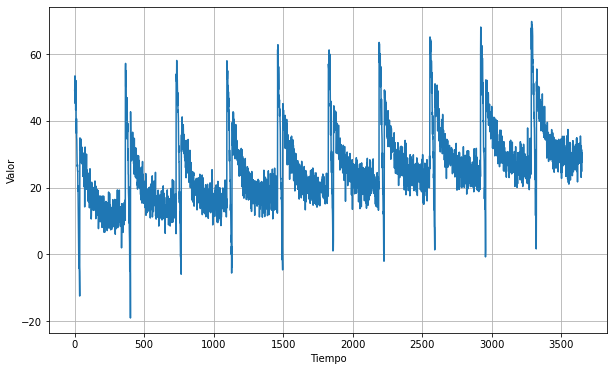

In [9]:
def trend(time, slope=0):
    """Creación de una linea recta como tendencia 
    por un tiempo determinado(time) y una pendiente(slope)"""
    return slope * time

def seasonal_pattern(season_time):
    """Patrón arbitrario estacional"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repite el mismo patrón cada cierto período (amplitude)"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    """Ruido aleatorio"""
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

#Definición del tiempo de la serie => 10 años
time = np.arange(10 * 365, dtype="float32")

#Variables de la serie
baseline = 10     #base de inicio a 10
amplitude = 40    #se repite la estacionalidad cada 40 puntos
slope = 0.005     #pendiente de la tendencia
noise_level = 3   #nivel de ruido

# Creación de la serie
# 1.- Tendencia
series = trend(time, slope)
# 2.- Añadimos la estacionalidad
series += baseline + seasonality(time, period=365, amplitude=amplitude)
# 3.- Añadimos el ruido
series += noise(time, noise_level, seed=51)

#Pintamos la serie
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Feature Engineering  
Debemos crear la ventana

In [13]:
WINDOW_SIZE = 365
HORIZON = 1

In [11]:
df = pd.DataFrame (series, columns=['Value'])
df

,Value
0,49.128490
1,50.268806
2,53.472332
3,45.280701
4,49.163799
...,...
3645,28.547541
3646,31.398434
3647,27.564049
3648,30.485130


In [14]:
df = pd.DataFrame (series, columns=['Value'])
df_windowed = df.copy()

#Añadimos el valor -1 hasta WINDOW_SIZE
list_cols = list(df.columns)

for i in range(1,WINDOW_SIZE+HORIZON):
    list_cols.append(list_cols[0]+'-'+str(i))
    print(list_cols[0]+'-'+str(i))
    df_windowed = pd.concat([df_windowed, df.shift(i)], axis=1)

df_windowed.head(20)

Value-1
Value-2
Value-3
Value-4
Value-5
Value-6
Value-7
Value-8
Value-9
Value-10
Value-11
Value-12
Value-13
Value-14
Value-15
Value-16
Value-17
Value-18
Value-19
Value-20
Value-21
Value-22
Value-23
Value-24
Value-25
Value-26
Value-27
Value-28
Value-29
Value-30
Value-31
Value-32
Value-33
Value-34
Value-35
Value-36
Value-37
Value-38
Value-39
Value-40
Value-41
Value-42
Value-43
Value-44
Value-45
Value-46
Value-47
Value-48
Value-49
Value-50
Value-51
Value-52
Value-53
Value-54
Value-55
Value-56
Value-57
Value-58
Value-59
Value-60
Value-61
Value-62
Value-63
Value-64
Value-65
Value-66
Value-67
Value-68
Value-69
Value-70
Value-71
Value-72
Value-73
Value-74
Value-75
Value-76
Value-77
Value-78
Value-79
Value-80
Value-81
Value-82
Value-83
Value-84
Value-85
Value-86
Value-87
Value-88
Value-89
Value-90
Value-91
Value-92
Value-93
Value-94
Value-95
Value-96
Value-97
Value-98
Value-99
Value-100
Value-101
Value-102
Value-103
Value-104
Value-105
Value-106
Value-107
Value-108
Value-109
Value-110
Value-11

,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value,...,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value
0,49.128490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.268806,49.128490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53.472332,50.268806,49.128490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45.280701,53.472332,50.268806,49.128490,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49.163799,45.280701,53.472332,50.268806,49.128490,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,48.079697,49.163799,45.280701,53.472332,50.268806,49.128490,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,46.376030,48.079697,49.163799,45.280701,53.472332,50.268806,49.128490,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,43.264309,46.376030,48.079697,49.163799,45.280701,53.472332,50.268806,49.128490,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,44.429771,43.264309,46.376030,48.079697,49.163799,45.280701,53.472332,50.268806,49.128490,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799,45.280701,53.472332,50.268806,49.128490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
list_cols

['Value',
 'Value-1',
 'Value-2',
 'Value-3',
 'Value-4',
 'Value-5',
 'Value-6',
 'Value-7',
 'Value-8',
 'Value-9',
 'Value-10',
 'Value-11',
 'Value-12',
 'Value-13',
 'Value-14',
 'Value-15',
 'Value-16',
 'Value-17',
 'Value-18',
 'Value-19',
 'Value-20',
 'Value-21',
 'Value-22',
 'Value-23',
 'Value-24',
 'Value-25',
 'Value-26',
 'Value-27',
 'Value-28',
 'Value-29',
 'Value-30',
 'Value-31',
 'Value-32',
 'Value-33',
 'Value-34',
 'Value-35',
 'Value-36',
 'Value-37',
 'Value-38',
 'Value-39',
 'Value-40',
 'Value-41',
 'Value-42',
 'Value-43',
 'Value-44',
 'Value-45',
 'Value-46',
 'Value-47',
 'Value-48',
 'Value-49',
 'Value-50',
 'Value-51',
 'Value-52',
 'Value-53',
 'Value-54',
 'Value-55',
 'Value-56',
 'Value-57',
 'Value-58',
 'Value-59',
 'Value-60',
 'Value-61',
 'Value-62',
 'Value-63',
 'Value-64',
 'Value-65',
 'Value-66',
 'Value-67',
 'Value-68',
 'Value-69',
 'Value-70',
 'Value-71',
 'Value-72',
 'Value-73',
 'Value-74',
 'Value-75',
 'Value-76',
 'Value-77'

In [85]:
#Renombramos las columnas
list_cols = ['Target'] + list_cols
list_cols.pop(len(list_cols)-1)
df_windowed.columns = list_cols
df_windowed.head()

,Target,Value,Value-1,Value-2,Value-3,Value-4,Value-5,Value-6,Value-7,Value-8,...,Value-355,Value-356,Value-357,Value-358,Value-359,Value-360,Value-361,Value-362,Value-363,Value-364
0,49.128490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.268806,49.128490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53.472332,50.268806,49.128490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45.280701,53.472332,50.268806,49.128490,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49.163799,45.280701,53.472332,50.268806,49.12849,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#Eliminamos los registros con algún nulo
df_windowed.dropna(axis=0, inplace=True)
df_windowed.head()

,Target,Value,Value-1,Value-2,Value-3,Value-4,Value-5,Value-6,Value-7,Value-8,...,Value-355,Value-356,Value-357,Value-358,Value-359,Value-360,Value-361,Value-362,Value-363,Value-364
365,54.999229,10.252112,11.298034,11.093969,15.901895,16.209154,11.280838,11.980693,15.569292,8.912371,...,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799,45.280701,53.472332,50.268806,49.128490
366,57.215916,54.999229,10.252112,11.298034,11.093969,15.901895,16.209154,11.280838,11.980693,15.569292,...,41.489967,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799,45.280701,53.472332,50.268806
367,50.276794,57.215916,54.999229,10.252112,11.298034,11.093969,15.901895,16.209154,11.280838,11.980693,...,39.834278,41.489967,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799,45.280701,53.472332
368,55.071667,50.276794,57.215916,54.999229,10.252112,11.298034,11.093969,15.901895,16.209154,11.280838,...,36.233761,39.834278,41.489967,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799,45.280701
369,52.056149,55.071667,50.276794,57.215916,54.999229,10.252112,11.298034,11.093969,15.901895,16.209154,...,40.650417,36.233761,39.834278,41.489967,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799


## Train & Test split

In [87]:
len(df_windowed)


3285

7 años de train, 1 de test y 1 de validación

In [88]:
X = df_windowed.drop('Target', axis=1)
y = df_windowed['Target']

SPLIT_TIME1 =  len(df_windowed) - 2*365
SPLIT_TIME2 =  len(df_windowed) - 365

X_train, X_test, X_valid = X.iloc[:SPLIT_TIME1], X.iloc[SPLIT_TIME1:SPLIT_TIME2], X.iloc[SPLIT_TIME2:]
y_train, y_test, y_valid = y.iloc[:SPLIT_TIME1], y.iloc[SPLIT_TIME1:SPLIT_TIME2], y.iloc[SPLIT_TIME2]

#X_train = X.iloc[:SPLIT_TIME1]
#X_test = X.iloc[SPLIT_TIME1:SPLIT_TIME2]
#X_valid = X.iloc[SPLIT_TIME2:]

In [89]:
X_train.head()

,Value,Value-1,Value-2,Value-3,Value-4,Value-5,Value-6,Value-7,Value-8,Value-9,...,Value-355,Value-356,Value-357,Value-358,Value-359,Value-360,Value-361,Value-362,Value-363,Value-364
365,10.252112,11.298034,11.093969,15.901895,16.209154,11.280838,11.980693,15.569292,8.912371,11.301671,...,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799,45.280701,53.472332,50.268806,49.128490
366,54.999229,10.252112,11.298034,11.093969,15.901895,16.209154,11.280838,11.980693,15.569292,8.912371,...,41.489967,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799,45.280701,53.472332,50.268806
367,57.215916,54.999229,10.252112,11.298034,11.093969,15.901895,16.209154,11.280838,11.980693,15.569292,...,39.834278,41.489967,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799,45.280701,53.472332
368,50.276794,57.215916,54.999229,10.252112,11.298034,11.093969,15.901895,16.209154,11.280838,11.980693,...,36.233761,39.834278,41.489967,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799,45.280701
369,55.071667,50.276794,57.215916,54.999229,10.252112,11.298034,11.093969,15.901895,16.209154,11.280838,...,40.650417,36.233761,39.834278,41.489967,52.072239,44.429771,43.264309,46.376030,48.079697,49.163799


In [97]:
X_test.head()

,Value,Value-1,Value-2,Value-3,Value-4,Value-5,Value-6,Value-7,Value-8,Value-9,...,Value-355,Value-356,Value-357,Value-358,Value-359,Value-360,Value-361,Value-362,Value-363,Value-364
2920,23.335089,25.734812,28.276749,19.472645,20.962742,27.017361,25.190762,25.147501,24.624546,23.655180,...,57.517460,59.753548,63.792767,60.735821,64.339699,63.739132,61.153603,60.055668,65.134109,59.949356
2921,61.043179,23.335089,25.734812,28.276749,19.472645,20.962742,27.017361,25.190762,25.147501,24.624546,...,52.991749,57.517460,59.753548,63.792767,60.735821,64.339699,63.739132,61.153603,60.055668,65.134109
2922,68.104980,61.043179,23.335089,25.734812,28.276749,19.472645,20.962742,27.017361,25.190762,25.147501,...,57.993118,52.991749,57.517460,59.753548,63.792767,60.735821,64.339699,63.739132,61.153603,60.055668
2923,62.737251,68.104980,61.043179,23.335089,25.734812,28.276749,19.472645,20.962742,27.017361,25.190762,...,56.106335,57.993118,52.991749,57.517460,59.753548,63.792767,60.735821,64.339699,63.739132,61.153603
2924,62.089008,62.737251,68.104980,61.043179,23.335089,25.734812,28.276749,19.472645,20.962742,27.017361,...,48.323475,56.106335,57.993118,52.991749,57.517460,59.753548,63.792767,60.735821,64.339699,63.739132


In [91]:
X_valid.head()

,Value,Value-1,Value-2,Value-3,Value-4,Value-5,Value-6,Value-7,Value-8,Value-9,...,Value-355,Value-356,Value-357,Value-358,Value-359,Value-360,Value-361,Value-362,Value-363,Value-364
3285,27.335226,26.826309,24.081820,23.996227,26.887590,28.806185,32.450470,26.888763,34.785538,24.311689,...,62.536789,60.170277,56.723598,62.174957,60.232857,60.324116,62.089008,62.737251,68.104980,61.043179
3286,67.854309,27.335226,26.826309,24.081820,23.996227,26.887590,28.806185,32.450470,26.888763,34.785538,...,56.705833,62.536789,60.170277,56.723598,62.174957,60.232857,60.324116,62.089008,62.737251,68.104980
3287,61.379692,67.854309,27.335226,26.826309,24.081820,23.996227,26.887590,28.806185,32.450470,26.888763,...,56.472401,56.705833,62.536789,60.170277,56.723598,62.174957,60.232857,60.324116,62.089008,62.737251
3288,69.772247,61.379692,67.854309,27.335226,26.826309,24.081820,23.996227,26.887590,28.806185,32.450470,...,47.676697,56.472401,56.705833,62.536789,60.170277,56.723598,62.174957,60.232857,60.324116,62.089008
3289,62.659168,69.772247,61.379692,67.854309,27.335226,26.826309,24.081820,23.996227,26.887590,28.806185,...,58.798023,47.676697,56.472401,56.705833,62.536789,60.170277,56.723598,62.174957,60.232857,60.324116


## Train & Test

In [92]:
model = GradientBoostingRegressor(n_estimators=40, random_state=1, verbose=1)
results = model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1          83.2572           11.90s
         2          70.5711           11.32s
         3          60.1204           10.82s
         4          51.5860           10.37s
         5          44.5179           10.64s
         6          38.6572           10.16s
         7          33.7119            9.93s
         8          29.7415            9.64s
         9          26.3840            9.30s
        10          23.7247            8.98s
        20          11.6462            5.93s
        30           9.2048            2.92s
        40           8.4033            0.00s


In [93]:
y_pred = model.predict(X_test)

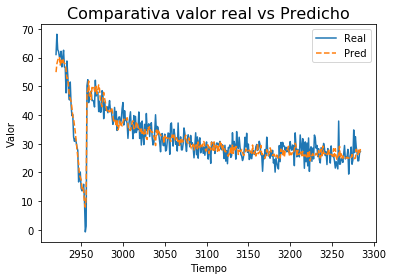

In [94]:
#ponemos y_pred en un dataframe para tener mismos índices que y_test y así poderlos plotar a la vez
forecast = pd.DataFrame (y_pred, columns=['Target'], index=range(y_test.first_valid_index(),y_test.last_valid_index()+1))

plt.plot(y_test, label='Real')
plt.plot(forecast, '--', label='Pred')

plt.title('Comparativa valor real vs Predicho', fontsize=16)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()


In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Error mse: ', mean_squared_error(y_test, forecast))
print('Error mae: ', mean_absolute_error(y_test, forecast))

Error mse:  11.805328516012606
Error mae:  2.6809465769784007


In [98]:
model.score

<bound method RegressorMixin.score of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)>

Este error es prediciendo solo el próximo valor

## Como guardarse el modelo para ejecutarlo en modo predictivo posteriormente

In [83]:
import pickle

#Guarda el modelo
pickle.dump(model,open('XGBoost_Forecast_SerieSintetica.sav','wb'))

In [85]:
nuevo_modelo = pickle.load(open('XGBoost_Forecast_SerieSintetica.sav', 'rb'))
y_pred = nuevo_modelo.predict(X_test)

In [92]:
nuevo_modelo.feature_importances_

array([4.28963751e-02, 3.05556804e-02, 2.17116002e-02, 1.03101644e-02,
       6.35556405e-04, 2.61709749e-03, 2.39102596e-03, 5.22992399e-04,
       1.17284196e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.73664046e-03, 1.14800338e-04, 7.45760803e-04, 0.00000000e+00,
       1.56042339e-04, 0.00000000e+00, 3.76807421e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.29550807e-03, 0.00000000e+00, 1.22608258e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.77708866e-04, 0.00000000e+00,
       1.54522643e-03, 0.00000000e+00, 0.00000000e+00, 6.82390010e-04,
       0.00000000e+00, 5.29343645e-03, 0.00000000e+00, 3.92761695e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.79133014e-05, 0.00000000e+00, 1.42735208e-03,
       1.20192703e-04, 6.41524519e-04, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
#Añadiremos el nombre a las columnas de las importancias de cada col
list_cols2 = list_cols.copy()
list_cols2.pop(0)  #Quitamos la columna Target

In [105]:
df_features = pd.DataFrame(nuevo_modelo.feature_importances_, columns=['Importance'],index=list_cols2)
df_features.head()

,Importance
Value,0.042896
Value-1,0.030556
Value-2,0.021712
Value-3,0.010310
Value-4,0.000636


In [118]:
best_features = df_features.sort_values(by=['Importance'],ascending='False')
best_features.tail(10)

,Importance
Value-41,0.005293
Value-3,0.010310
Value-2,0.021712
Value-1,0.030556
Value-361,0.032943
Value-362,0.037970
Value,0.042896
Value-365,0.056505
Value-363,0.071874
Value-364,0.642932


## Para predecir todo un año entero


In [ ]:
list_pred = []

for val in X_test:
    